# Task 3 - Mortgage Analysis

This notebook will analyse mortgage data through exploratory data analysis and will aim to identify relationships between mortgage features and find niches and groupings within the dataset.

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Load and view data

In [ ]:
# Load data
df = pd.read_csv('mortgage.csv')

In [3]:
# Describe data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mortgage_id,1941,1941,1ad9ba91c6541dd973cc924b6db7e311,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mortgage_type,1941,2,owner_occupied,1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mortgage_payment_type,1941,3,repayment,1897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mortgage_property_value,1941.0,NaN,NaN,NaN,286110.252447,273066.711767,40000.0,160000.0,240000.0,350000.0,9500000.0
mortgage_loan_amount,1941.0,NaN,NaN,NaN,142400.824317,98524.192849,10000.0,90000.0,120000.0,170000.0,2280000.0
mortgage_initial_rate,1941.0,NaN,NaN,NaN,2.10814,0.529487,0.9,1.8,2.0,2.2,6.0
mortgage_scheme,1941,2,fixed,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mortgage_state_updated,1941,5,open,1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# View data
df.head()

,mortgage_id,mortgage_type,mortgage_payment_type,mortgage_property_value,mortgage_loan_amount,mortgage_initial_rate,mortgage_scheme,mortgage_state_updated
0,1ad9ba91c6541dd973cc924b6db7e311,owner_occupied,repayment,550000,290000,2.2,fixed,open
1,317ac7153428730d726b5a4b7a71122b,owner_occupied,repayment,100000,70000,2.9,fixed,not_interested
2,5fa4b3e4d22120eead8f9100c4f569a7,owner_occupied,repayment,150000,130000,2.1,fixed,open
3,f28af39dd73b97dabe87cc8258a3293e,owner_occupied,repayment,230000,110000,1.9,fixed,open
4,38c1ce04c7f6b3982075ea9dcf7b6bda,owner_occupied,repayment,1200000,90000,1.8,fixed,open


### Compare Features

We can plot our categorical features as bar plots to see the counts for each value within the feature:

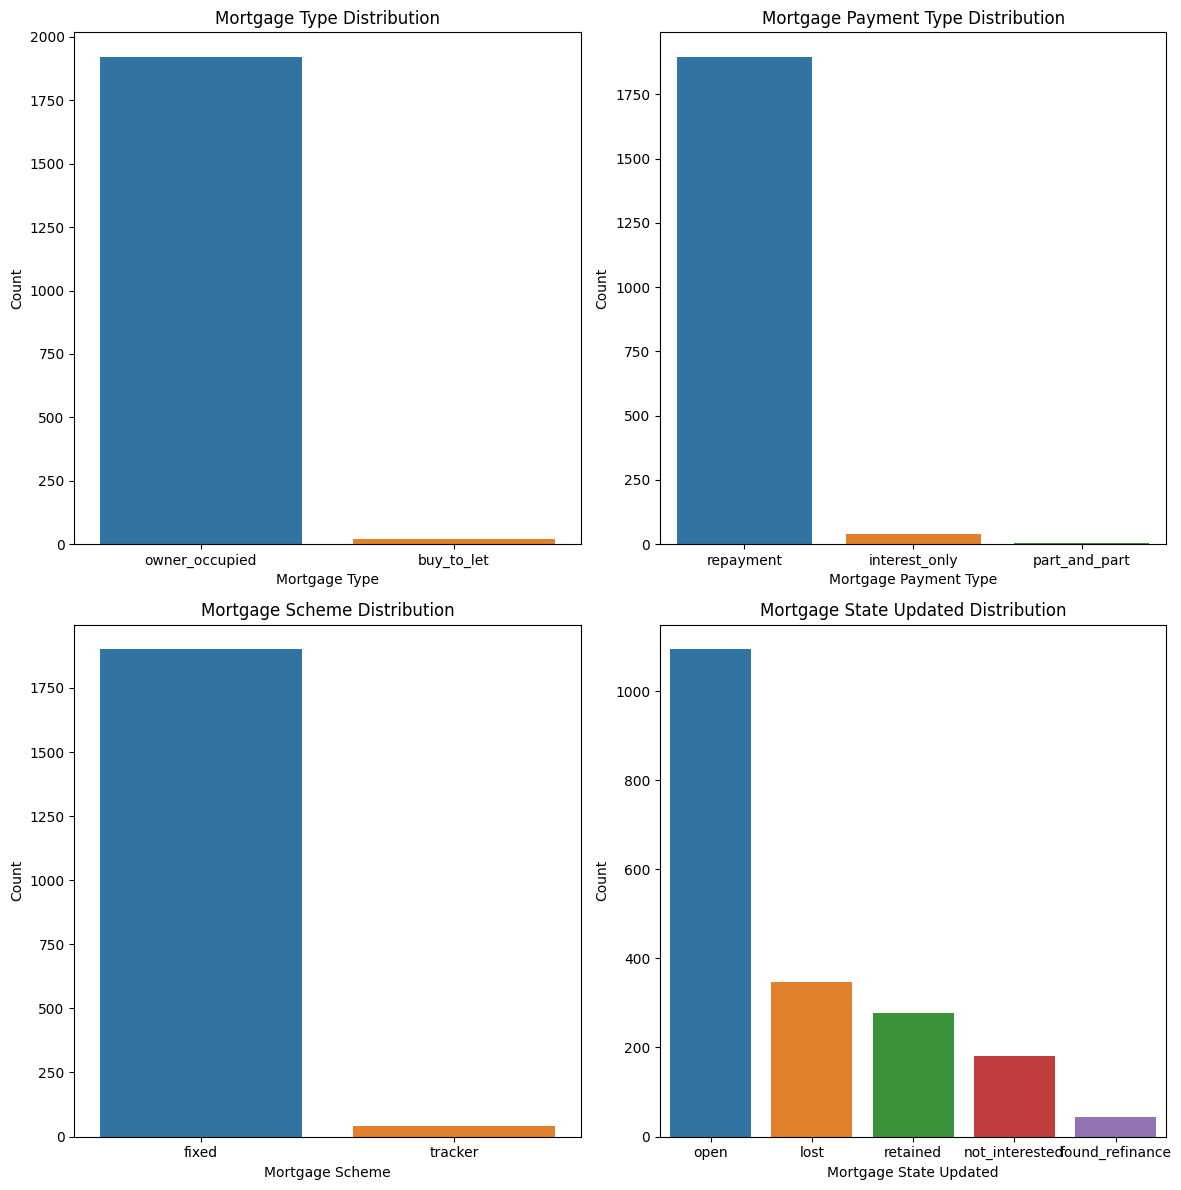

In [5]:
# Group data 
mortgage_type_counts = df['mortgage_type'].value_counts()
mortgage_payment_type_counts = df['mortgage_payment_type'].value_counts()
mortgage_scheme_counts = df['mortgage_scheme'].value_counts()
mortgage_state_updatede_counts = df['mortgage_state_updated'].value_counts()

# Create a figure and two axes side by side
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

# Bar chart for Mortgage Type Distribution
sns.barplot(x=mortgage_type_counts.index, y=mortgage_type_counts.values, ax=ax1, palette='tab10')
ax1.set_title('Mortgage Type Distribution')
ax1.set_xlabel('Mortgage Type')
ax1.set_ylabel('Count')

# Bar chart for Mortgage Payment Type Distribution
sns.barplot(x=mortgage_payment_type_counts.index, y=mortgage_payment_type_counts.values, ax=ax2, palette='tab10')
ax2.set_title('Mortgage Payment Type Distribution')
ax2.set_xlabel('Mortgage Payment Type')
ax2.set_ylabel('Count')

# Bar chart for Mortgage Scheme Distribution
sns.barplot(x=mortgage_scheme_counts.index, y=mortgage_scheme_counts.values, ax=ax3, palette='tab10')
ax3.set_title('Mortgage Scheme Distribution')
ax3.set_xlabel('Mortgage Scheme')
ax3.set_ylabel('Count')

# Bar chart for Mortgage State Updated Distribution
sns.barplot(x=mortgage_state_updatede_counts.index, y=mortgage_state_updatede_counts.values, ax=ax4, palette='tab10')
ax4.set_title('Mortgage State Updated Distribution')
ax4.set_xlabel('Mortgage State Updated')
ax4.set_ylabel('Count')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

We can also plot scatter graphs to compare our continious features:

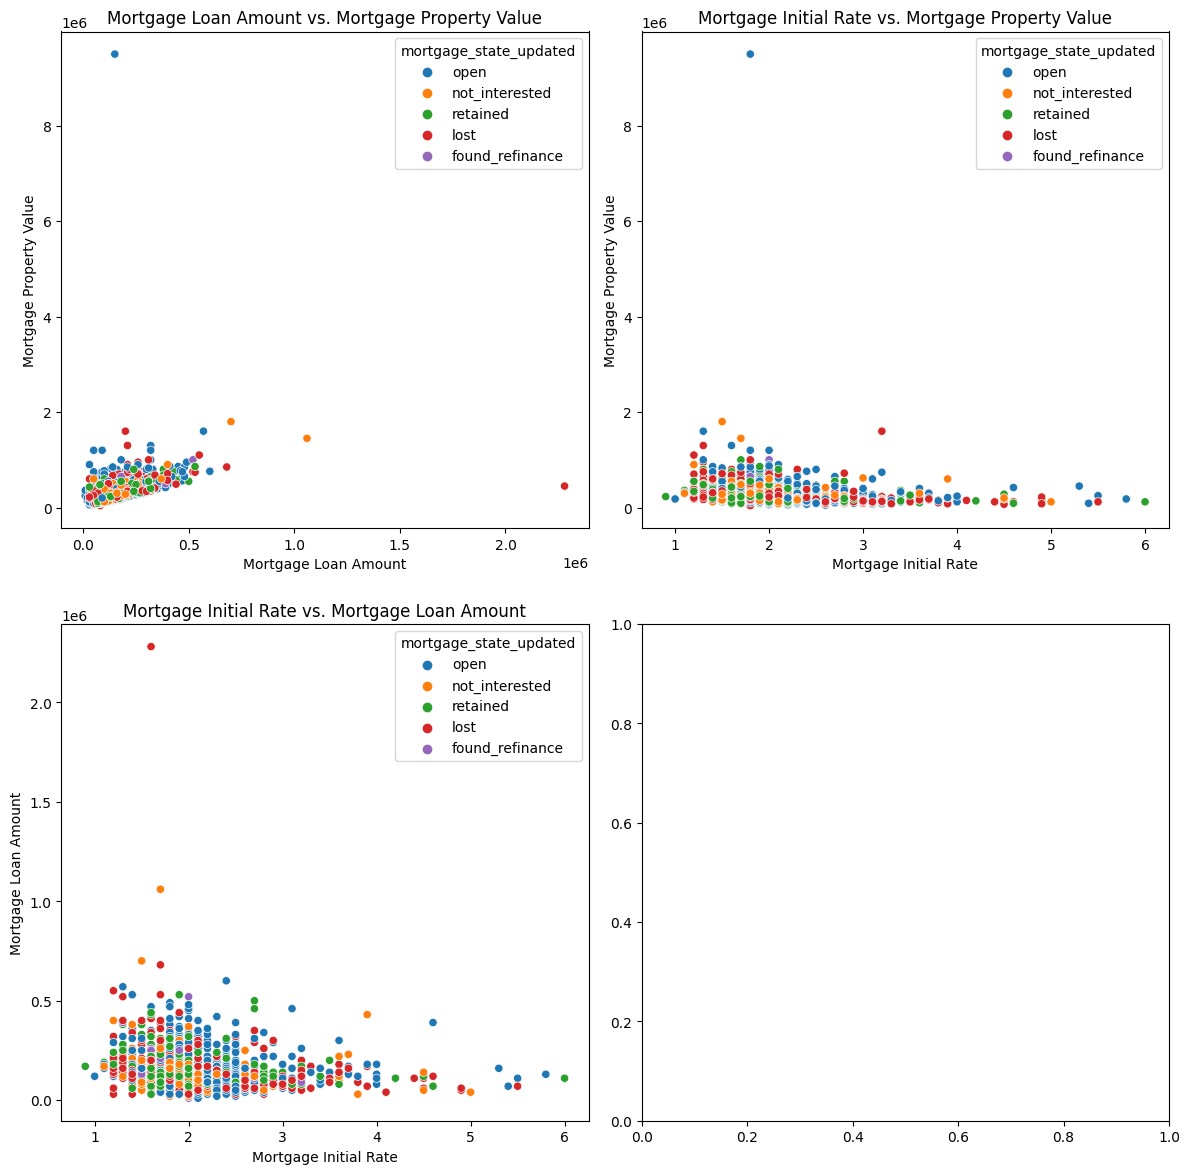

In [6]:
# Create a figure and three axes in a 1x3 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

# Scatter plot for combination 1
sns.scatterplot(data=df, x='mortgage_loan_amount', y='mortgage_property_value', hue='mortgage_state_updated', ax=ax1)
ax1.set_xlabel('Mortgage Loan Amount')
ax1.set_ylabel('Mortgage Property Value')
ax1.set_title('Mortgage Loan Amount vs. Mortgage Property Value')

# Scatter plot for combination 2
sns.scatterplot(data=df, x='mortgage_initial_rate', y='mortgage_property_value', hue='mortgage_state_updated', ax=ax2)
ax2.set_xlabel('Mortgage Initial Rate')
ax2.set_ylabel('Mortgage Property Value')
ax2.set_title('Mortgage Initial Rate vs. Mortgage Property Value')

# Scatter plot for combination 3
sns.scatterplot(data=df, x='mortgage_initial_rate', y='mortgage_loan_amount', hue='mortgage_state_updated', ax=ax3)
ax3.set_xlabel('Mortgage Initial Rate')
ax3.set_ylabel('Mortgage Loan Amount')
ax3.set_title('Mortgage Initial Rate vs. Mortgage Loan Amount')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

### Plotting a correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

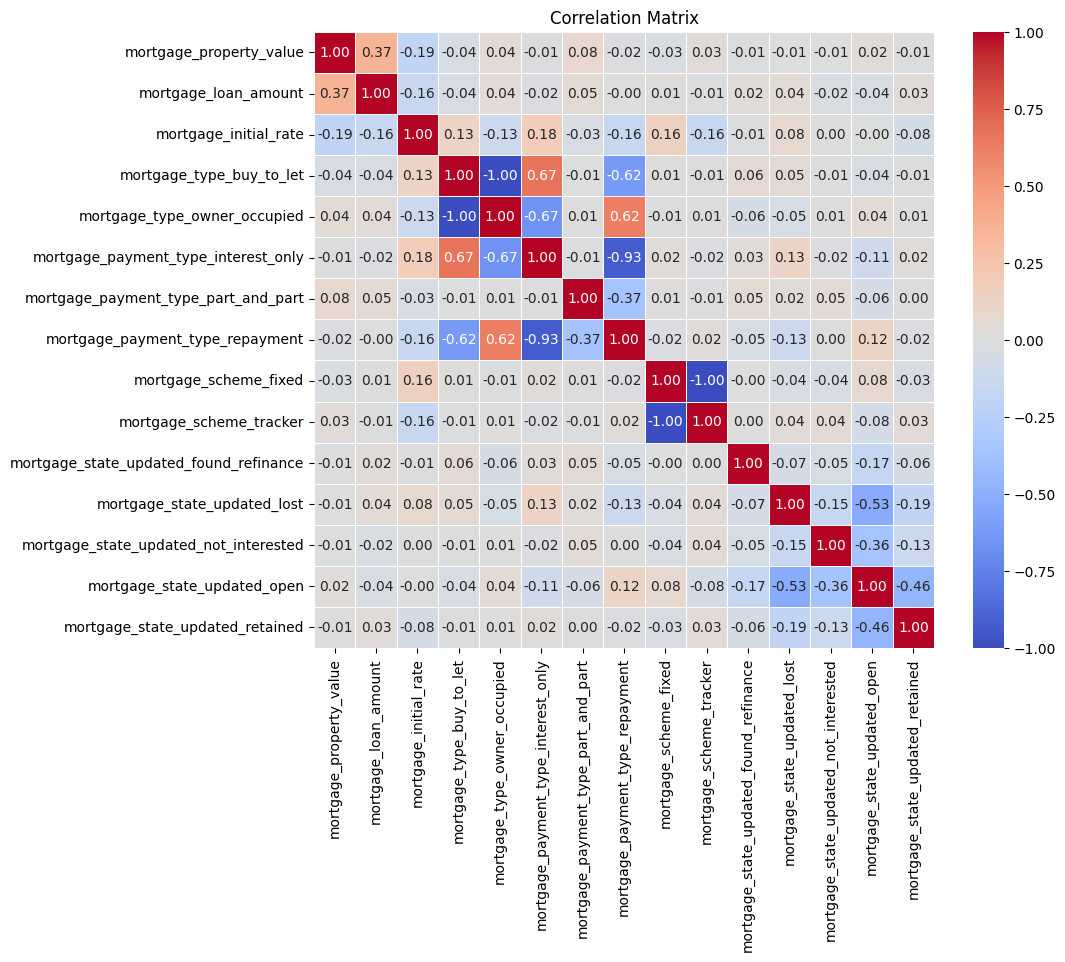

In [7]:
# Drop ID column
df.drop('mortgage_id', axis=1, inplace=True)

# Encode categorical columns
df_encoded = pd.get_dummies(df)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")

### Clustering our data:

We can use the KNN clustering algorithm to group our data into clusters. We will attempt to use the elbow method to identify the optimal number of clusters:

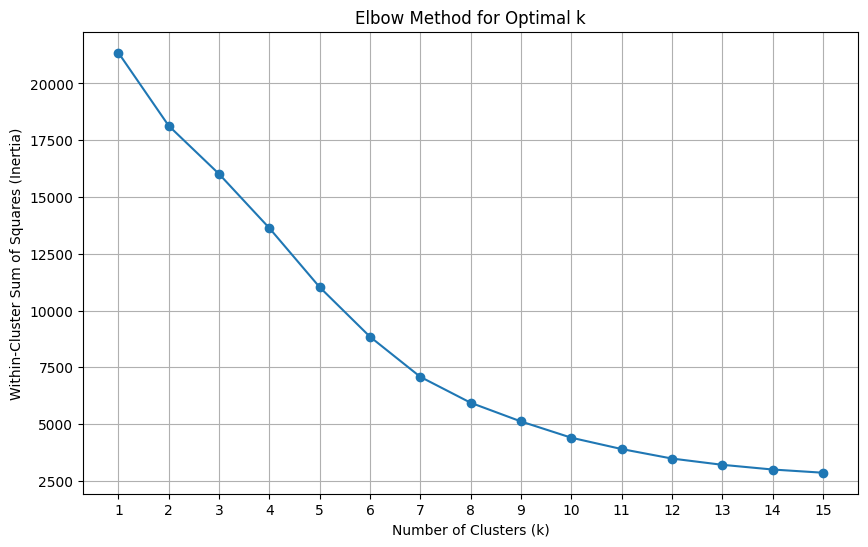

In [10]:
# Encode the data again but drop first this time
df_encoded = pd.get_dummies(df, drop_first=True)

# Standardise the numerical columns
scaler = StandardScaler()
df_encoded_scaled = scaler.fit_transform(df_encoded)

# Define a range of clusters to try (e.g., from 1 to 10 clusters)
min_clusters = 1
max_clusters = 15
num_clusters_range = range(min_clusters, max_clusters + 1)

# Initialize a list to store the within-cluster sum of squares (inertia) for each k
inertia_values = []

# Explicitly set the value of n_init
n_init = 10

# Calculate inertia for each k value
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
    kmeans.fit(df_encoded_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(num_clusters_range)
plt.grid(True)


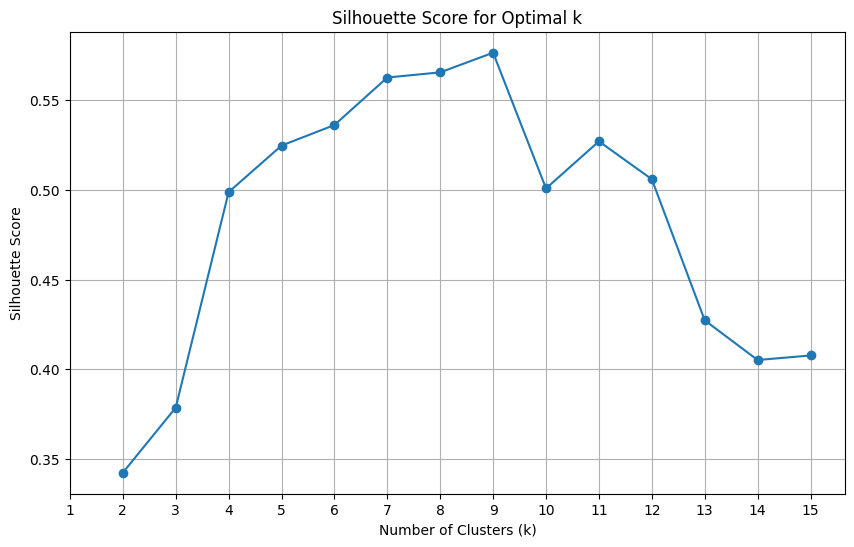

In [13]:
from sklearn.metrics import silhouette_score

# Initialise a list to store the silhouette scores for each k
silhouette_scores = []

# Calculate silhouette score for each k value
for k in num_clusters_range:
    if k > 1:
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
        kmeans.fit(df_encoded_scaled)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(df_encoded_scaled, labels))
    else:
        silhouette_scores.append(None)  # Placeholder for k=1, as silhouette is undefined

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(num_clusters_range)
plt.grid(True)

In [14]:
# Initialise the KMeans model with five clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the scaled data
kmeans.fit(df_encoded_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['cluster'] = cluster_labels

c:\Users\samke\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Size of Each Cluster')

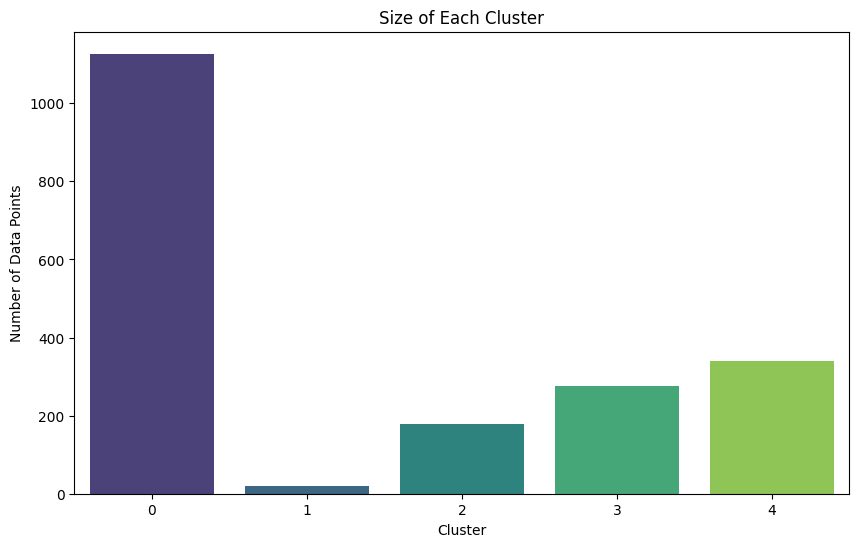

In [17]:
# Get the count of each cluster
cluster_sizes = df['cluster'].value_counts().reset_index()
cluster_sizes.columns = ['Cluster', 'Count']

# Sort the clusters by their label (optional, for better visualization)
cluster_sizes = cluster_sizes.sort_values(by='Cluster')

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Count', data=cluster_sizes, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Size of Each Cluster')

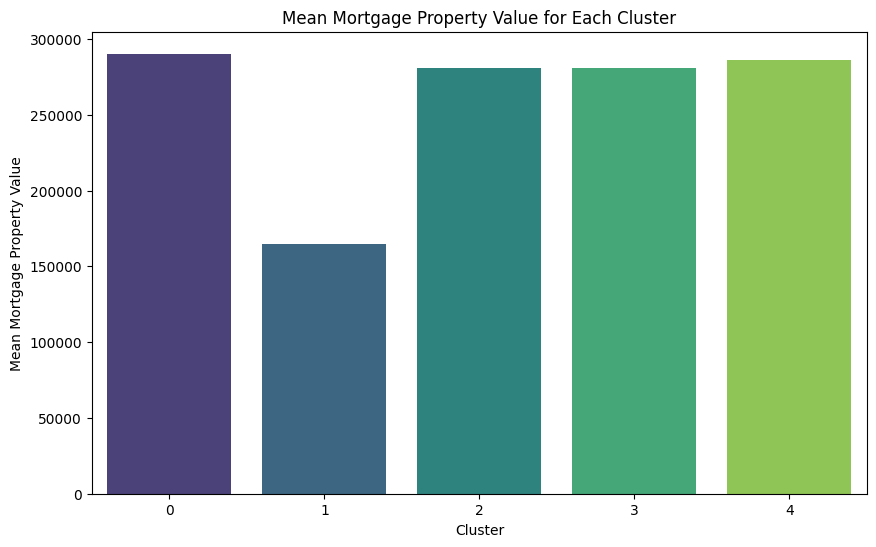

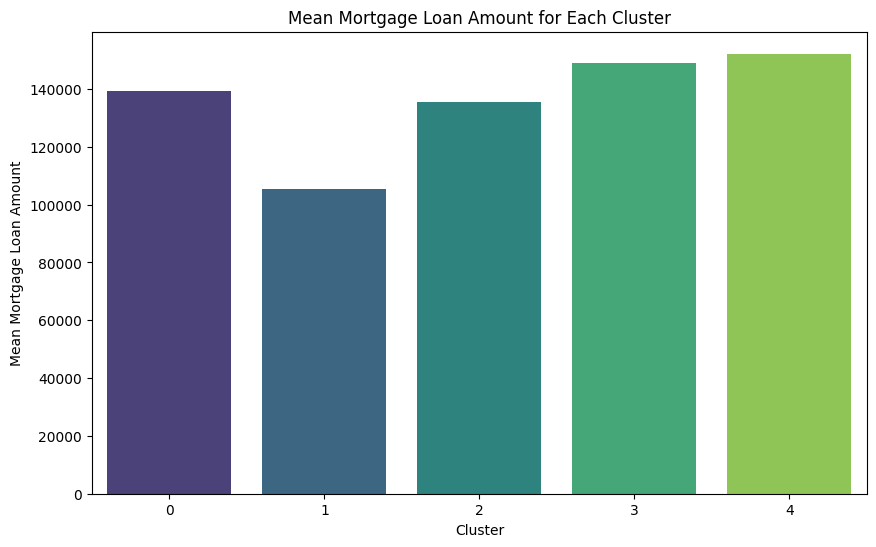

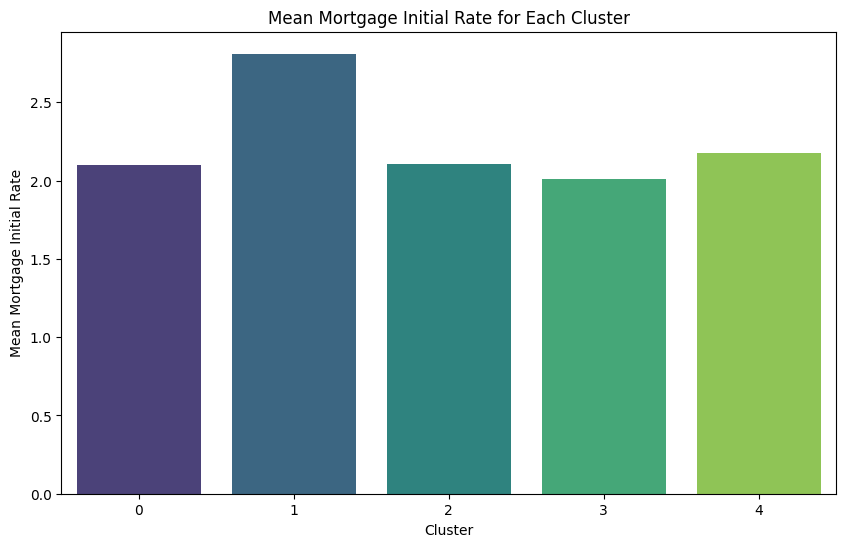

In [28]:
# Calculate the mean values for each cluster
cluster_means = df.groupby('cluster')[['mortgage_property_value', 'mortgage_loan_amount', 'mortgage_initial_rate']].mean().reset_index()

# Plot bar graphs
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='mortgage_property_value', data=cluster_means, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Mean Mortgage Property Value')
plt.title('Mean Mortgage Property Value for Each Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='mortgage_loan_amount', data=cluster_means, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Mean Mortgage Loan Amount')
plt.title('Mean Mortgage Loan Amount for Each Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='mortgage_initial_rate', data=cluster_means, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Mean Mortgage Initial Rate')
plt.title('Mean Mortgage Initial Rate for Each Cluster')
plt.show()

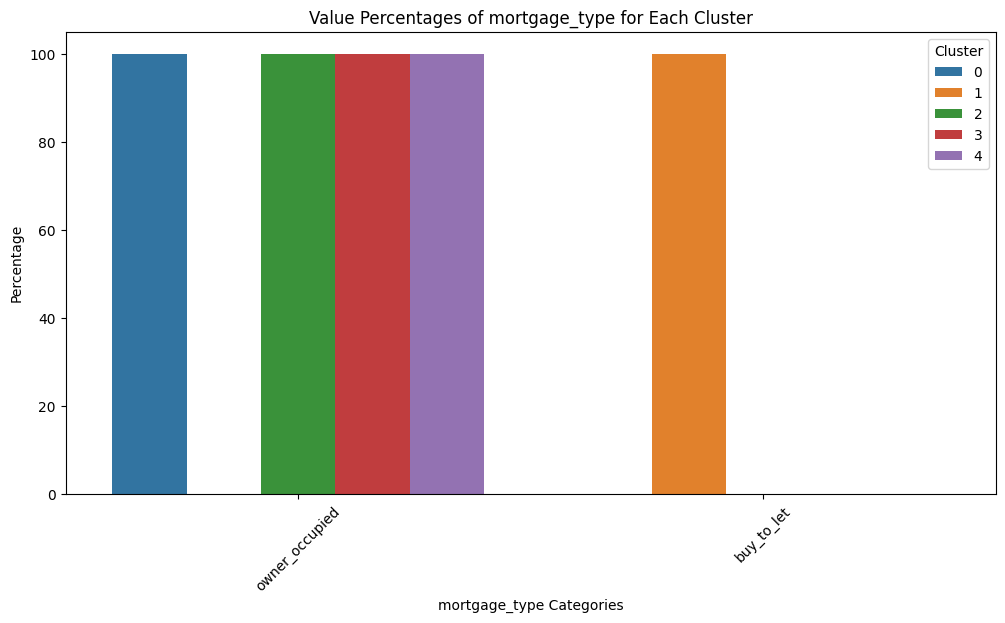

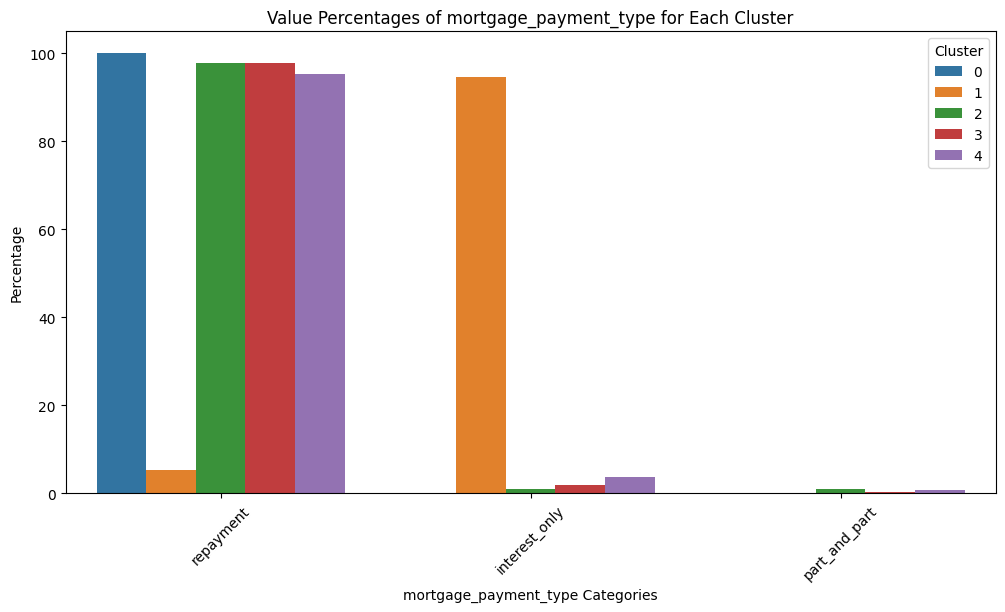

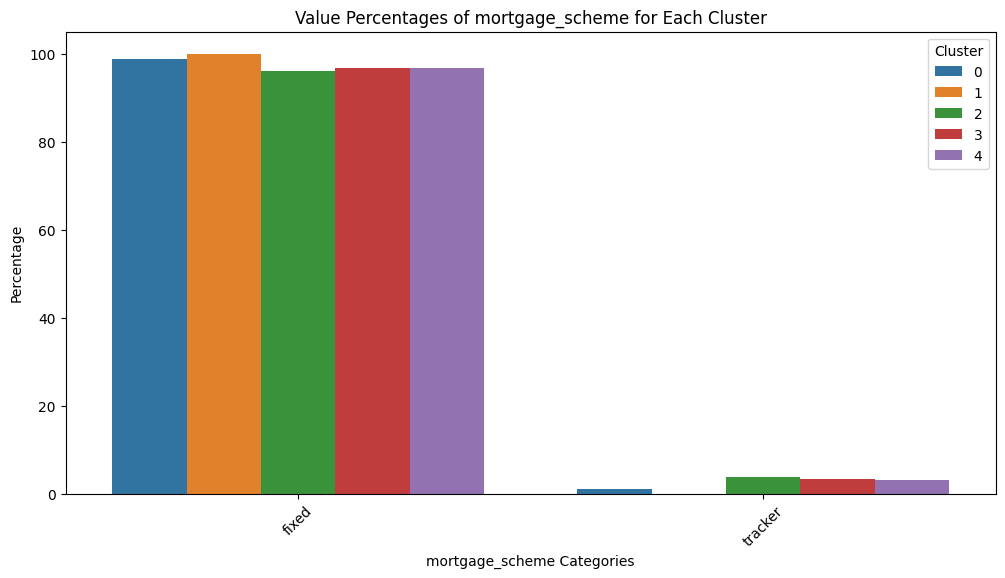

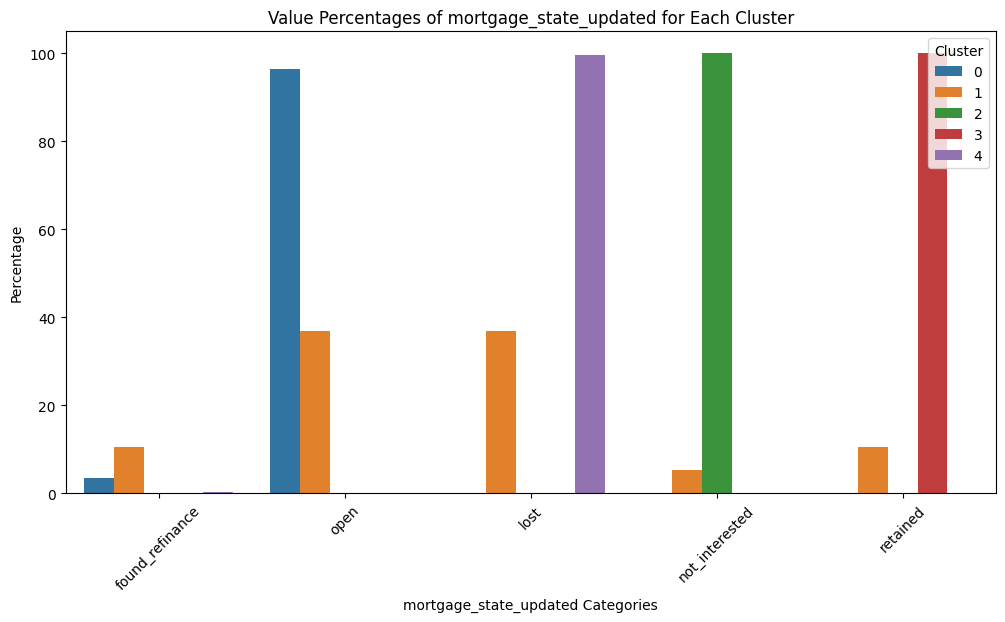

In [29]:
# Categorical columns in the DataFrame
categorical_columns = ['mortgage_type', 'mortgage_payment_type', 'mortgage_scheme', 'mortgage_state_updated']

# Plot value percentages for each categorical feature in each cluster
for feature in categorical_columns:
    plt.figure(figsize=(12, 6))
    
    # Calculate value percentages for each cluster and feature
    cluster_feature_percentages = (
        df.groupby(['cluster', feature]).size() / df.groupby('cluster').size() * 100
    ).reset_index(name='Percentage')
    
    sns.barplot(x=feature, y='Percentage', hue='cluster', data=cluster_feature_percentages, palette='tab10')
    plt.xlabel(f'{feature} Categories')
    plt.ylabel('Percentage')
    plt.title(f'Value Percentages of {feature} for Each Cluster')
    plt.legend(title='Cluster', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

## Conclusion

In the exploratory analysis of the mortgage data, we applied clustering techniques to identify distinct mortgage niches and groupings based on selected features: 'mortgage_property_value,' 'mortgage_loan_amount,' and 'mortgage_initial_rate.'

After applying the K-means clustering algorithm and using the elbow method to determine the optimal number of clusters, we identified five distinct clusters representing different mortgage niches. Each cluster exhibits specific characteristics that differentiate them from one another:

1. **Cluster 0:** This is by far the largest cluster containing over half of the customers. It has the highest mean mortgage propert value and the second-lowest mean mortgage initial rate. It only includes owner-occupied mortgage types and repayment payment_types.The vast majority of the mortgage states are also open.

2. **Cluster 1:** This cluster only contains a very small subset of customers and contains mortgages with substantially lower property values and loan amounts with also the highest average initial rate. We can also see that this exclusively contains buy-to-let mortgage types and fixed rate mortgage schemes.

3. **Cluster 2:** This cluster has fairly average values for proprty values, loan amount and inital rate. It is the cluster that contains the highest proportion of tracker mortgage schemes and the majority of the mortgage states are not_interested. 

4. **Cluster 3:** This cluster comprises mortgages with fairly high loan amounts but low initial rates. It also exclusively contains customers have retained their mortgages. 

5. **Cluster 4:** This cluster represents mortgages the highest average loan amount and exclusively contains lost customers. 